$\textbf{PROGRAMMING ASSIGNMENT}$
---

Instructions:
1. Choose a unique dataset from: https://archive.ics.uci.edu
2. Your dataset should be unique from your classmates otherwise no points will be given for this exercise.
### Complete the Tasks in bold

In [1]:
# Library Imports
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
# fetch dataset 
iranian_churn = fetch_ucirepo(id=563) 
  
# data (as pandas dataframes) 
X = iranian_churn.data.features 
y = iranian_churn.data.targets 
  
# metadata 
print(iranian_churn.metadata) 
  
# variable information 
print(iranian_churn.variables) 

{'uci_id': 563, 'name': 'Iranian Churn', 'repository_url': 'https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/563/data.csv', 'abstract': "This dataset is randomly collected from an Iranian telecom company's database over a period of 12 months.", 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 3150, 'num_features': 13, 'feature_types': ['Integer'], 'demographics': ['Age'], 'target_col': ['Churn'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Sat Mar 09 2024', 'dataset_doi': '10.24432/C5JW3Z', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is randomly collected from an Iranian telecom companyâ€™s database over a period of 12 months. A total of 3150 rows of data, each representing a customer, bear information for 13 columns. The attribu

In [3]:
df = pd.concat([X, y], axis=1)

print(df)

      Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0                 8          0                    38               0   
1                 0          0                    39               0   
2                10          0                    37               0   
3                10          0                    38               0   
4                 3          0                    38               0   
...             ...        ...                   ...             ...   
3145             21          0                    19               2   
3146             17          0                    17               1   
3147             13          0                    18               4   
3148              7          0                    11               2   
3149              8          1                    11               2   

      Seconds of Use  Frequency of use  Frequency of SMS  \
0               4370                71                 5   
1              

## Data Exploration

**TASK: Create a correlation heatmap.**

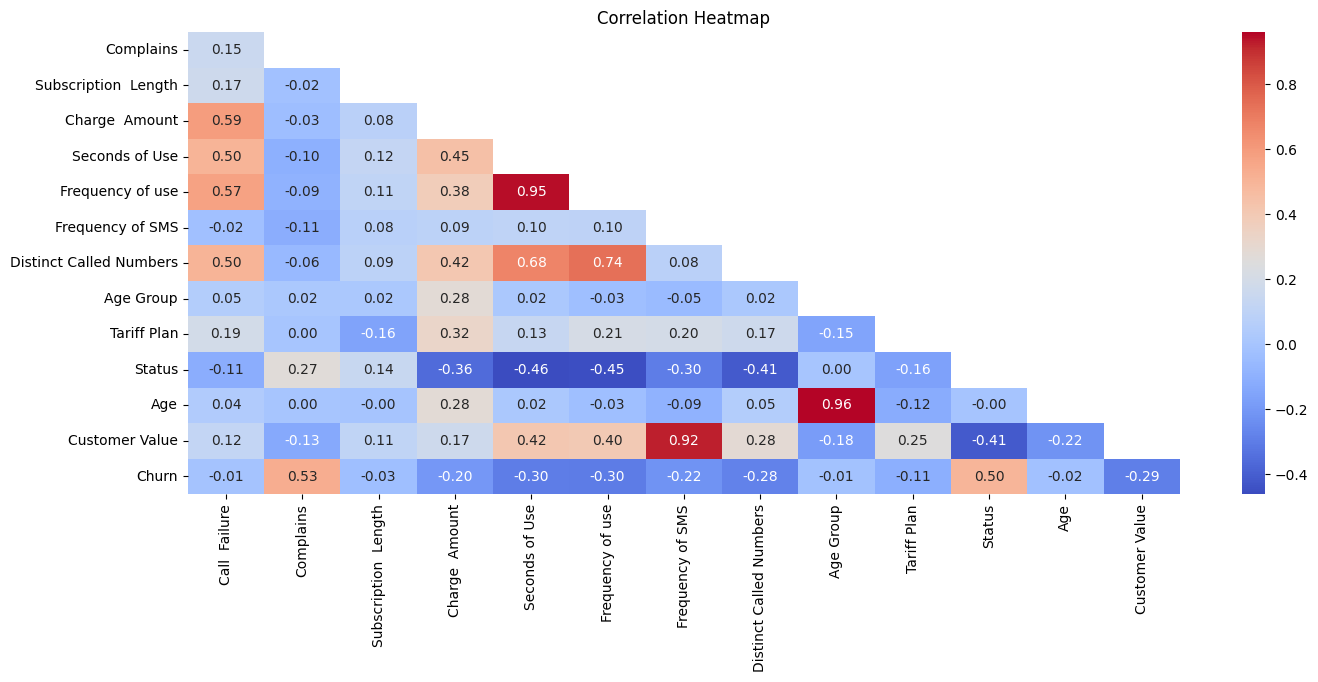

In [4]:
# --- CREATING A CORRELATION PLOT --- 
correlation_heatmap = df.corr()

plt.figure(figsize=(16, 6))

mask = np.triu(np.ones_like(correlation_heatmap, dtype=bool))
mask[np.triu_indices_from(mask)] = True

df_corr_viz = correlation_heatmap.mask(mask).dropna(how='all').dropna(axis=1, how='all')

sns.heatmap(df_corr_viz, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')

plt.show()

**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

In [5]:
correlation_with_target = df.corrwith(X.iloc[:, -1]).abs()

sorted_correlation = correlation_with_target.sort_values(ascending=False)

top_correlated_features = sorted_correlation.head(5)

top_correlated_features_rounded = top_correlated_features.round(6)

print("The top 5 correlated frequencies with the target/label:\n")
print(top_correlated_features)

The top 5 correlated frequencies with the target/label:

Customer Value      1.000000
Frequency of SMS    0.924877
Seconds of Use      0.415087
Status              0.412990
Frequency of use    0.401572
dtype: float64


## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: Do not forget to put a random_state for reproducibility.*

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (2835, 13)
y_train: (2835, 1)
X_test: (315, 13)
y_test: (315, 1)


**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [7]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('knn', KNeighborsRegressor())  
])

**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [8]:
param_grid = {'knn__n_neighbors': list(range(1,20))}
pipeline.set_params(knn=KNeighborsRegressor())

full_cv_regressor = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
full_cv_regressor.fit(X_train, y_train)

print("The best parameters are:")

param_dict = full_cv_regressor.best_estimator_.get_params()
full_cv_regressor.best_estimator_.get_params()

The best parameters are:


{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsRegressor(n_neighbors=4))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsRegressor(n_neighbors=4),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 4,
 'knn__p': 2,
 'knn__weights': 'uniform'}

**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

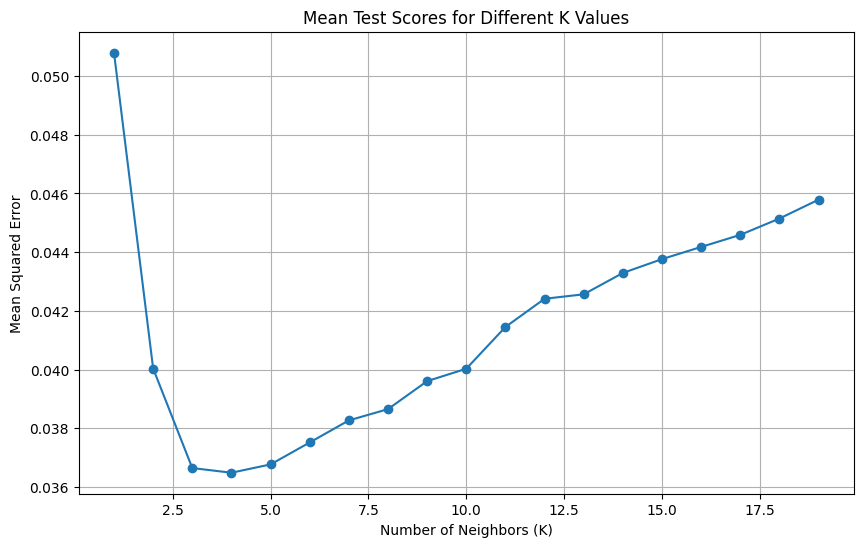

In [9]:
mean_test_scores = full_cv_regressor.cv_results_['mean_test_score']
k_values = param_grid['knn__n_neighbors']

mean_test_scores = -mean_test_scores

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error')
plt.title('Mean Test Scores for Different K Values')
plt.grid(True)
plt.show()


### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [10]:
y_bin = (y_train > 0.5).astype(int)
y_pred_bin = (full_cv_regressor.predict(X_train) > 0.5).astype(int)

print("Classification Report:")
print(classification_report(y_bin, y_pred_bin, zero_division=1))
print("Confusion Matrix:")
print(confusion_matrix(y_bin, y_pred_bin))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2393
           1       0.95      0.83      0.88       442

    accuracy                           0.97      2835
   macro avg       0.96      0.91      0.93      2835
weighted avg       0.96      0.97      0.96      2835

Confusion Matrix:
[[2372   21]
 [  77  365]]
